In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

### 1) Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [3]:
education.describe(include= 'all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492,1492,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,...,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,536.000000,532.000000,533.000000,498.000000
unique,1487,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,...,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,NaN,NaN,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,...,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.221511,10.159722,7.769616,6.803725
min,NaN,NaN,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,...,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,NaN,NaN,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,...,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,229.694352,272.761598,214.663401,259.533171
50%,NaN,NaN,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,...,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,237.238552,280.618803,220.416034,265.010912
75%,NaN,NaN,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,...,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121


In [4]:
cols = list(education.columns)
cols

['PRIMARY_KEY',
 'STATE',
 'YEAR',
 'ENROLL',
 'TOTAL_REVENUE',
 'FEDERAL_REVENUE',
 'STATE_REVENUE',
 'LOCAL_REVENUE',
 'TOTAL_EXPENDITURE',
 'INSTRUCTION_EXPENDITURE',
 'SUPPORT_SERVICES_EXPENDITURE',
 'OTHER_EXPENDITURE',
 'CAPITAL_OUTLAY_EXPENDITURE',
 'GRADES_PK_G',
 'GRADES_KG_G',
 'GRADES_4_G',
 'GRADES_8_G',
 'GRADES_12_G',
 'GRADES_1_8_G',
 'GRADES_9_12_G',
 'GRADES_ALL_G',
 'AVG_MATH_4_SCORE',
 'AVG_MATH_8_SCORE',
 'AVG_READING_4_SCORE',
 'AVG_READING_8_SCORE']

### 2) Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

In [5]:
education['STATE'].unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW_HAMPSHIRE',
       'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK', 'NORTH_CAROLINA',
       'NORTH_DAKOTA', 'OHIO', 'WYOMING', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA',
       'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'BUREAU_OF_INDIAN_AFFAIRS',
       'DOD_OVERSEAS', 'DOD_DOMESTIC', 'AMERICAN_SAMOA', 'GUAM',
       'NORTHERN_MARIANAS', 'PUERTO_RICO', 'VIRGIN_ISLANDS', 'BI', 'DD',
       'NORTHERN_MARIANA_ISLANDS', 'DEPARTMENT_OF_DEFENSE',
       'BUREAU_OF_INDIAN_EDUCATION',
       'DEPART

In [6]:
california = education[education['STATE'] == 'CALIFORNIA']

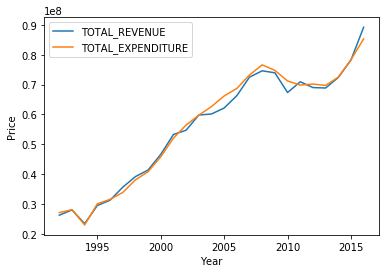

In [7]:
plt.plot(california['YEAR'], california['TOTAL_REVENUE'], label='TOTAL_REVENUE')
plt.plot(california['YEAR'], california['TOTAL_EXPENDITURE'], label='TOTAL_EXPENDITURE')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

### 3) In your chosen state, which of the lessons are the students more successful, math or reading?

In [8]:
print('Reading Means')
print(california['AVG_READING_4_SCORE'].mean())
print(california['AVG_READING_8_SCORE'].mean())
print('---------------')
print("Math Means")
print(california['AVG_MATH_4_SCORE'].mean())
print(california['AVG_MATH_8_SCORE'].mean())

Reading Means
207.91154673862795
261.90265181565036
---------------
Math Means
225.65962456591936
269.35524363566543


Looking at just the means, the students in california scored higher on their math exams

### 4) What are the distributions of the math and reading scores in the sample?

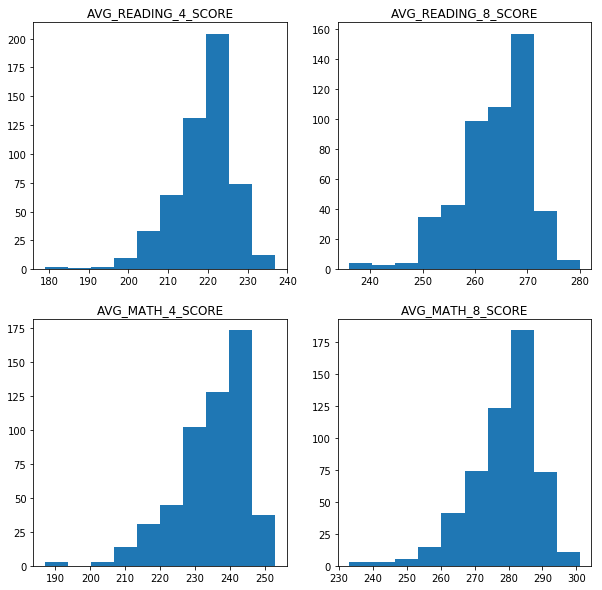

In [9]:
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.hist(education['AVG_READING_4_SCORE'].round(0), bins= 10)
plt.title('AVG_READING_4_SCORE')
plt.subplot(2, 2, 2)
plt.hist(education['AVG_READING_8_SCORE'].round(0), bins= 10)
plt.title('AVG_READING_8_SCORE')

plt.subplot(2, 2, 3)
plt.hist(education['AVG_MATH_4_SCORE'].round(0), bins= 10)
plt.title('AVG_MATH_4_SCORE')
plt.subplot(2, 2, 4)
plt.hist(education['AVG_MATH_8_SCORE'].round(0), bins= 10)
plt.title('AVG_MATH_8_SCORE')

plt.show()

### 5) Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

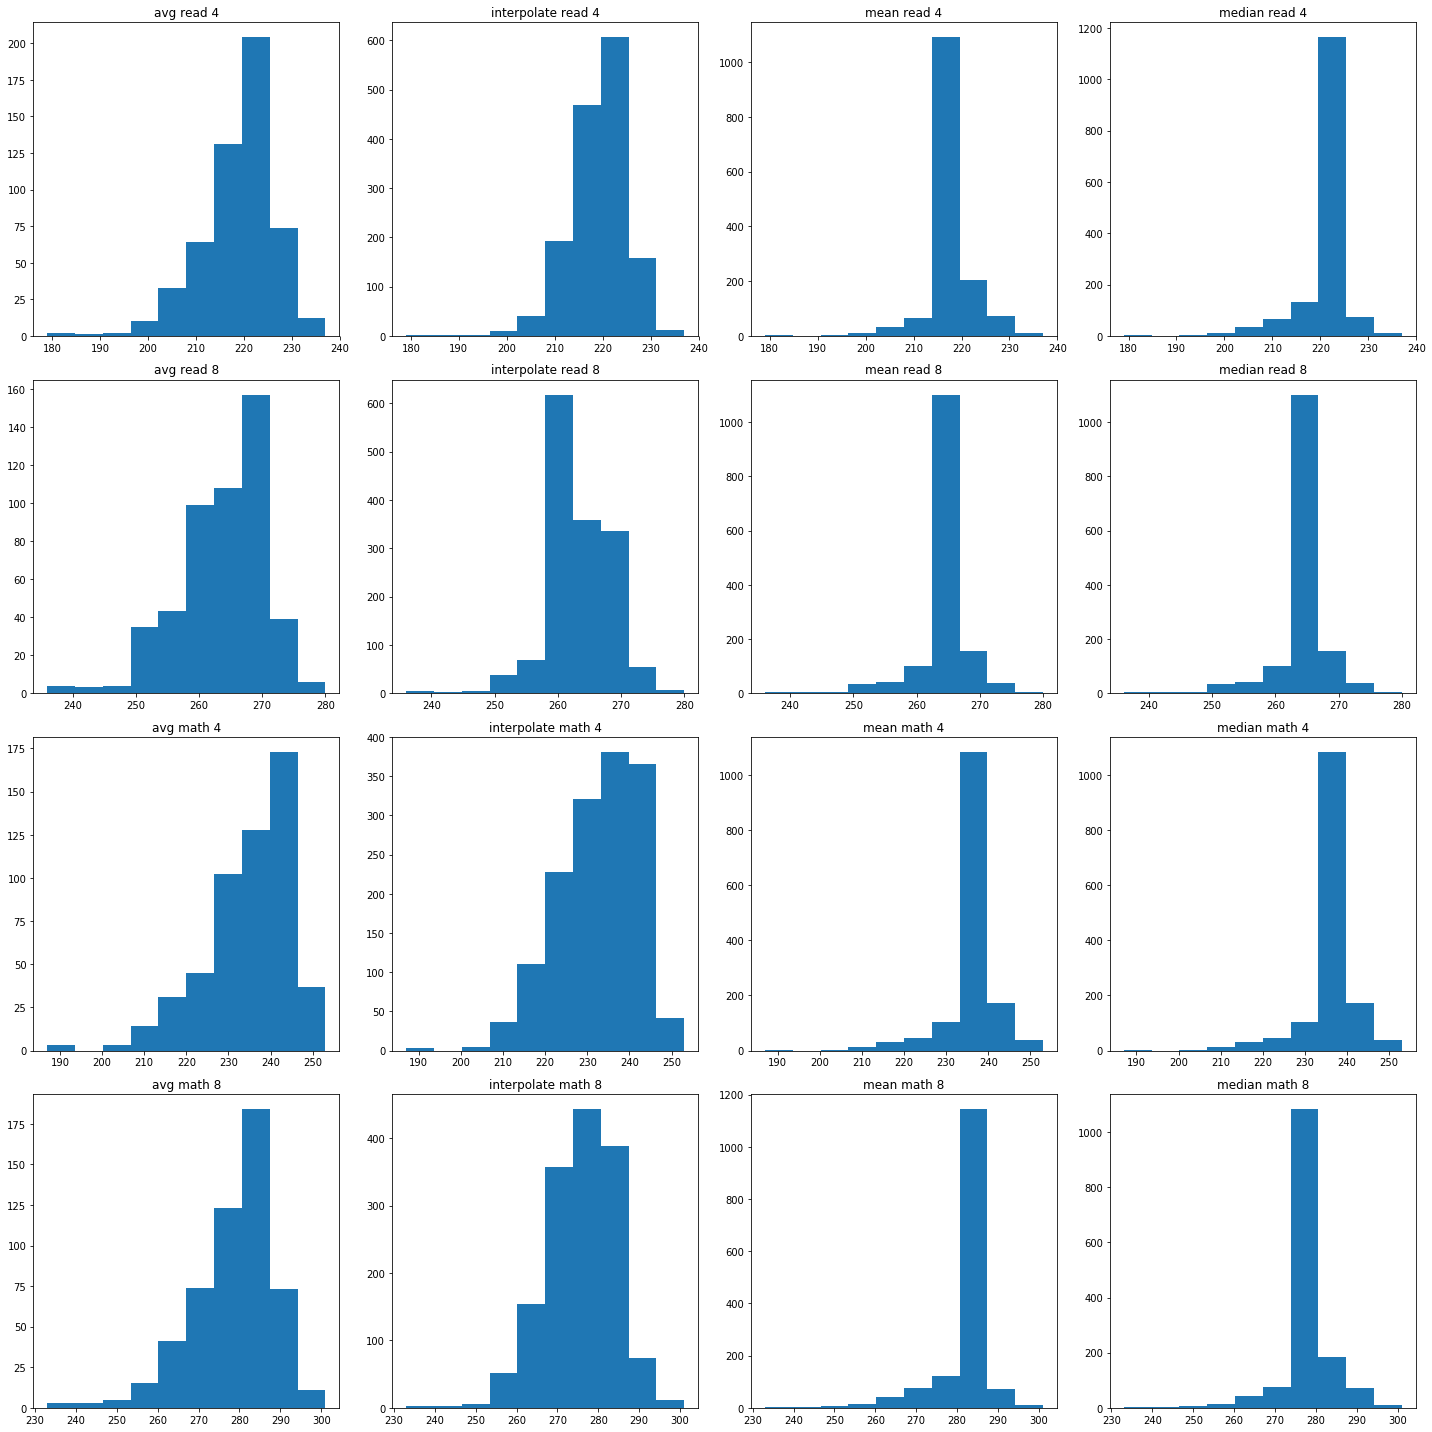

In [10]:
plt.figure(figsize=(20,20))

plt.subplot(4, 4, 1)
plt.hist(education['AVG_READING_4_SCORE'].dropna().round(0))
plt.title('avg read 4')
plt.subplot(4, 4, 2)
plt.hist(education['AVG_READING_4_SCORE'].interpolate().round(0))
plt.title('interpolate read 4')
plt.subplot(4, 4, 3)
plt.hist(education['AVG_READING_4_SCORE'].fillna(value= education['AVG_READING_4_SCORE'].mean()).round(0))
plt.title('mean read 4')
plt.subplot(4, 4, 4)
plt.hist(education['AVG_READING_4_SCORE'].fillna(value= education['AVG_READING_4_SCORE'].median()).round(0))
plt.title('median read 4')

plt.subplot(4, 4, 5)
plt.hist(education['AVG_READING_8_SCORE'].dropna().round(0))
plt.title('avg read 8')
plt.subplot(4, 4, 6)
plt.hist(education['AVG_READING_8_SCORE'].interpolate().round(0))
plt.title('interpolate read 8')
plt.subplot(4, 4, 7)
plt.hist(education['AVG_READING_8_SCORE'].fillna(value= education['AVG_READING_8_SCORE'].mean()).round(0))
plt.title('mean read 8')
plt.subplot(4, 4, 8)
plt.hist(education['AVG_READING_8_SCORE'].fillna(value= education['AVG_READING_8_SCORE'].median()).round(0))
plt.title('median read 8')

plt.subplot(4, 4, 9)
plt.hist(education['AVG_MATH_4_SCORE'].dropna().round(0))
plt.title('avg math 4')
plt.subplot(4, 4, 10)
plt.hist(education['AVG_MATH_4_SCORE'].interpolate().round(0))
plt.title('interpolate math 4')
plt.subplot(4, 4, 11)
plt.hist(education['AVG_MATH_4_SCORE'].fillna(value= education['AVG_MATH_4_SCORE'].mean()).round(0))
plt.title('mean math 4')
plt.subplot(4, 4, 12)
plt.hist(education['AVG_MATH_4_SCORE'].fillna(value= education['AVG_MATH_4_SCORE'].median()).round(0))
plt.title('median math 4')

plt.subplot(4, 4, 13)
plt.hist(education['AVG_MATH_8_SCORE'].dropna().round(0))
plt.title('avg math 8')
plt.subplot(4, 4, 14)
plt.hist(education['AVG_MATH_8_SCORE'].interpolate().round(0))
plt.title('interpolate math 8')
plt.subplot(4, 4, 15)
plt.hist(education['AVG_MATH_8_SCORE'].fillna(value= education['AVG_MATH_8_SCORE'].median()).round(0))
plt.title('mean math 8')
plt.subplot(4, 4, 16)
plt.hist(education['AVG_MATH_8_SCORE'].fillna(value= education['AVG_MATH_8_SCORE'].mean()).round(0))
plt.title('median math 8')

plt.tight_layout()
plt.show()